# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("indian_liver_patient.csv")

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.shape

(583, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

# EDA (Exploratory Data Analysis)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [8]:
df["Dataset"].value_counts()

Dataset
1    416
2    167
Name: count, dtype: int64

In [9]:
df['Dataset'].unique()

array([1, 2])

In [10]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

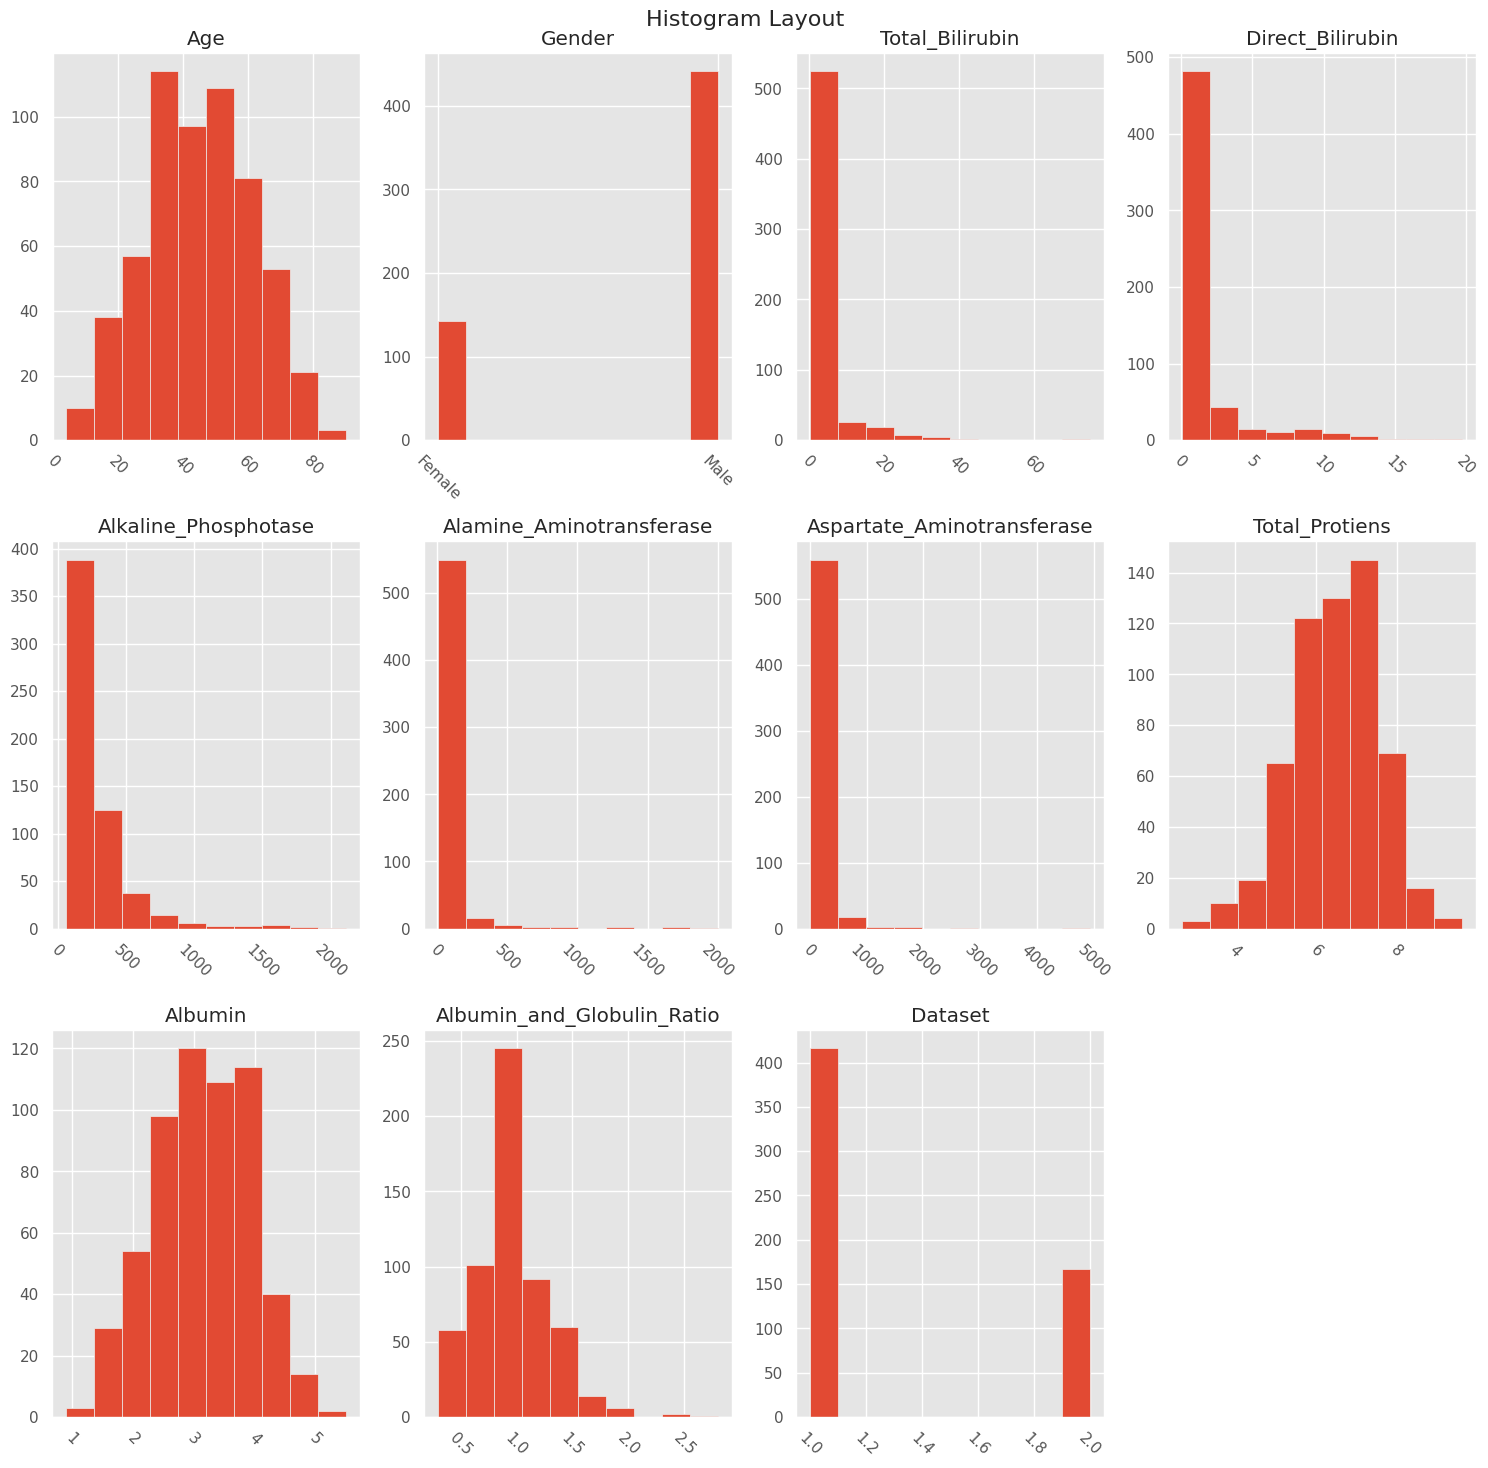

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))
fig.suptitle('Histogram Layout', fontsize=16)

# Flatten the axes array to make iteration easier
axes_flat = axes.flatten()

# Iterate through columns and plot histograms
for i, column in enumerate(df.columns):
    if i < 11:  # Limit to 11 columns
        df[column].hist(ax=axes_flat[i], bins=10)
        axes_flat[i].set_title(column)
        axes_flat[i].tick_params(axis='x', rotation=-45)

# Hide the last subplot
axes_flat[11].axis('off')

plt.tight_layout()
plt.show()

In [12]:
def convertdataset(x):
    if x==2:
        return 0
    return 1
df['Dataset'] = df['Dataset'].map(convertdataset)

In [13]:
df["Dataset"]

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 583, dtype: int64

In [14]:
df["Dataset"].value_counts()

Dataset
1    416
0    167
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Gender'>

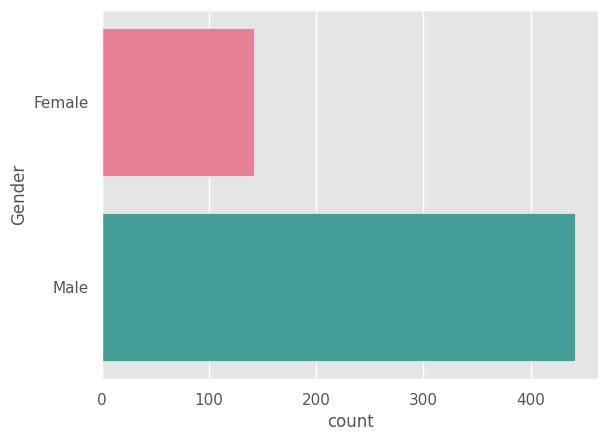

In [17]:
sns.countplot(y='Gender', data=df, palette='husl')

In [18]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


In [19]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [20]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Correlations & Heatmap

In [21]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


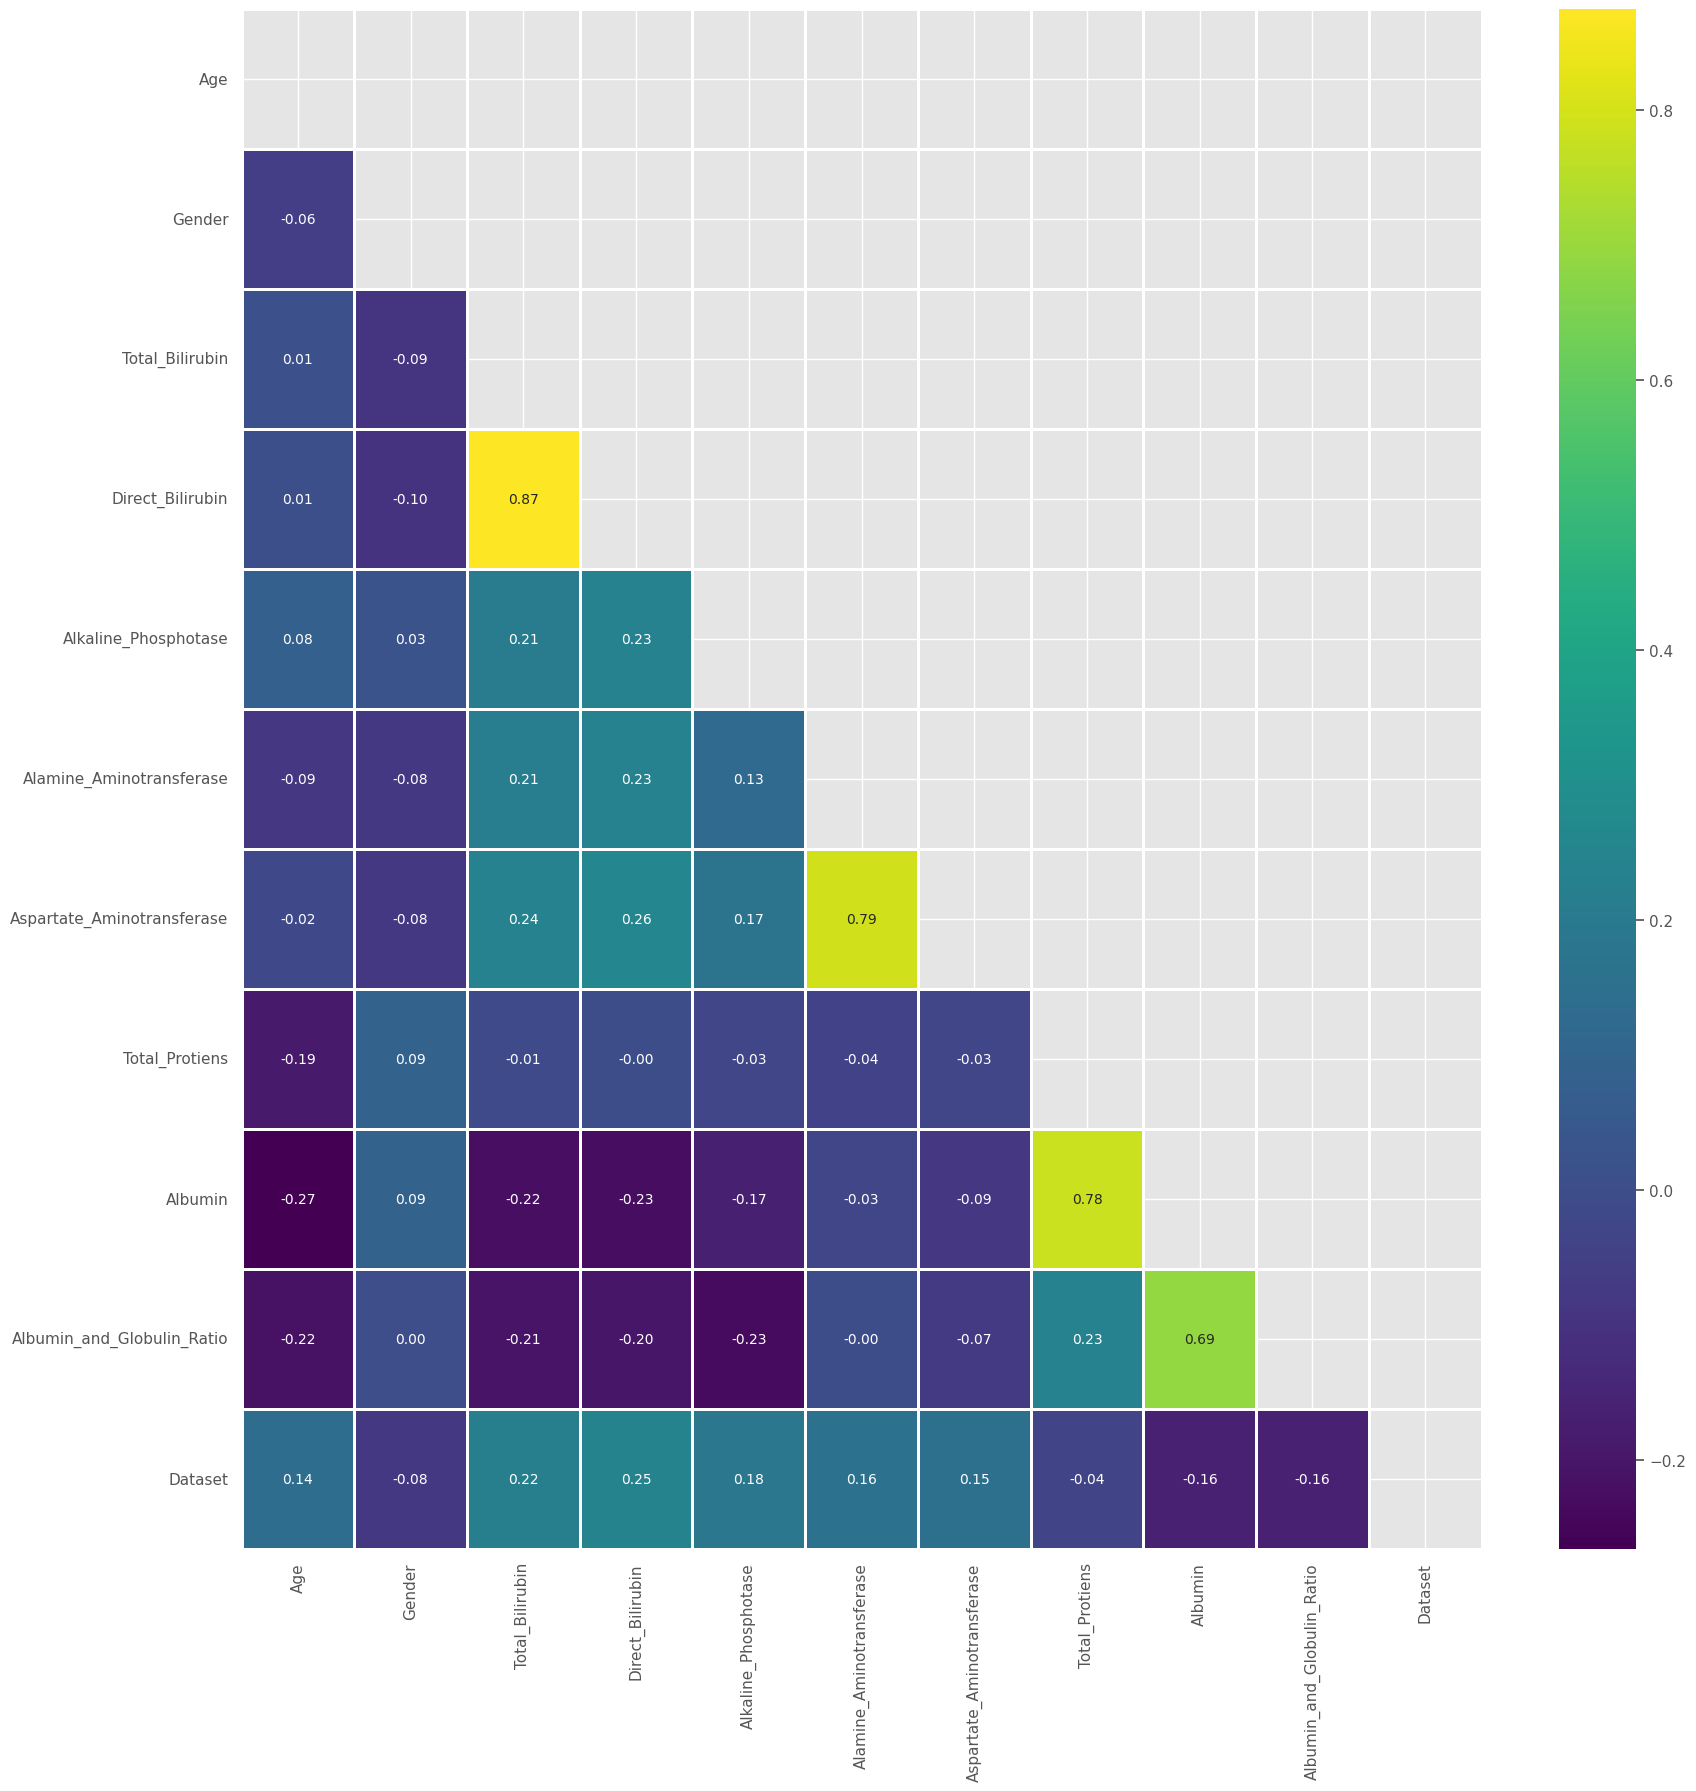

In [23]:
plt.figure(figsize=(20,20))
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f", cmap="viridis")
plt.show()

# Outlier Detection - Box Plots

In [24]:
df = df.drop_duplicates()

In [25]:
df.shape

(570, 11)

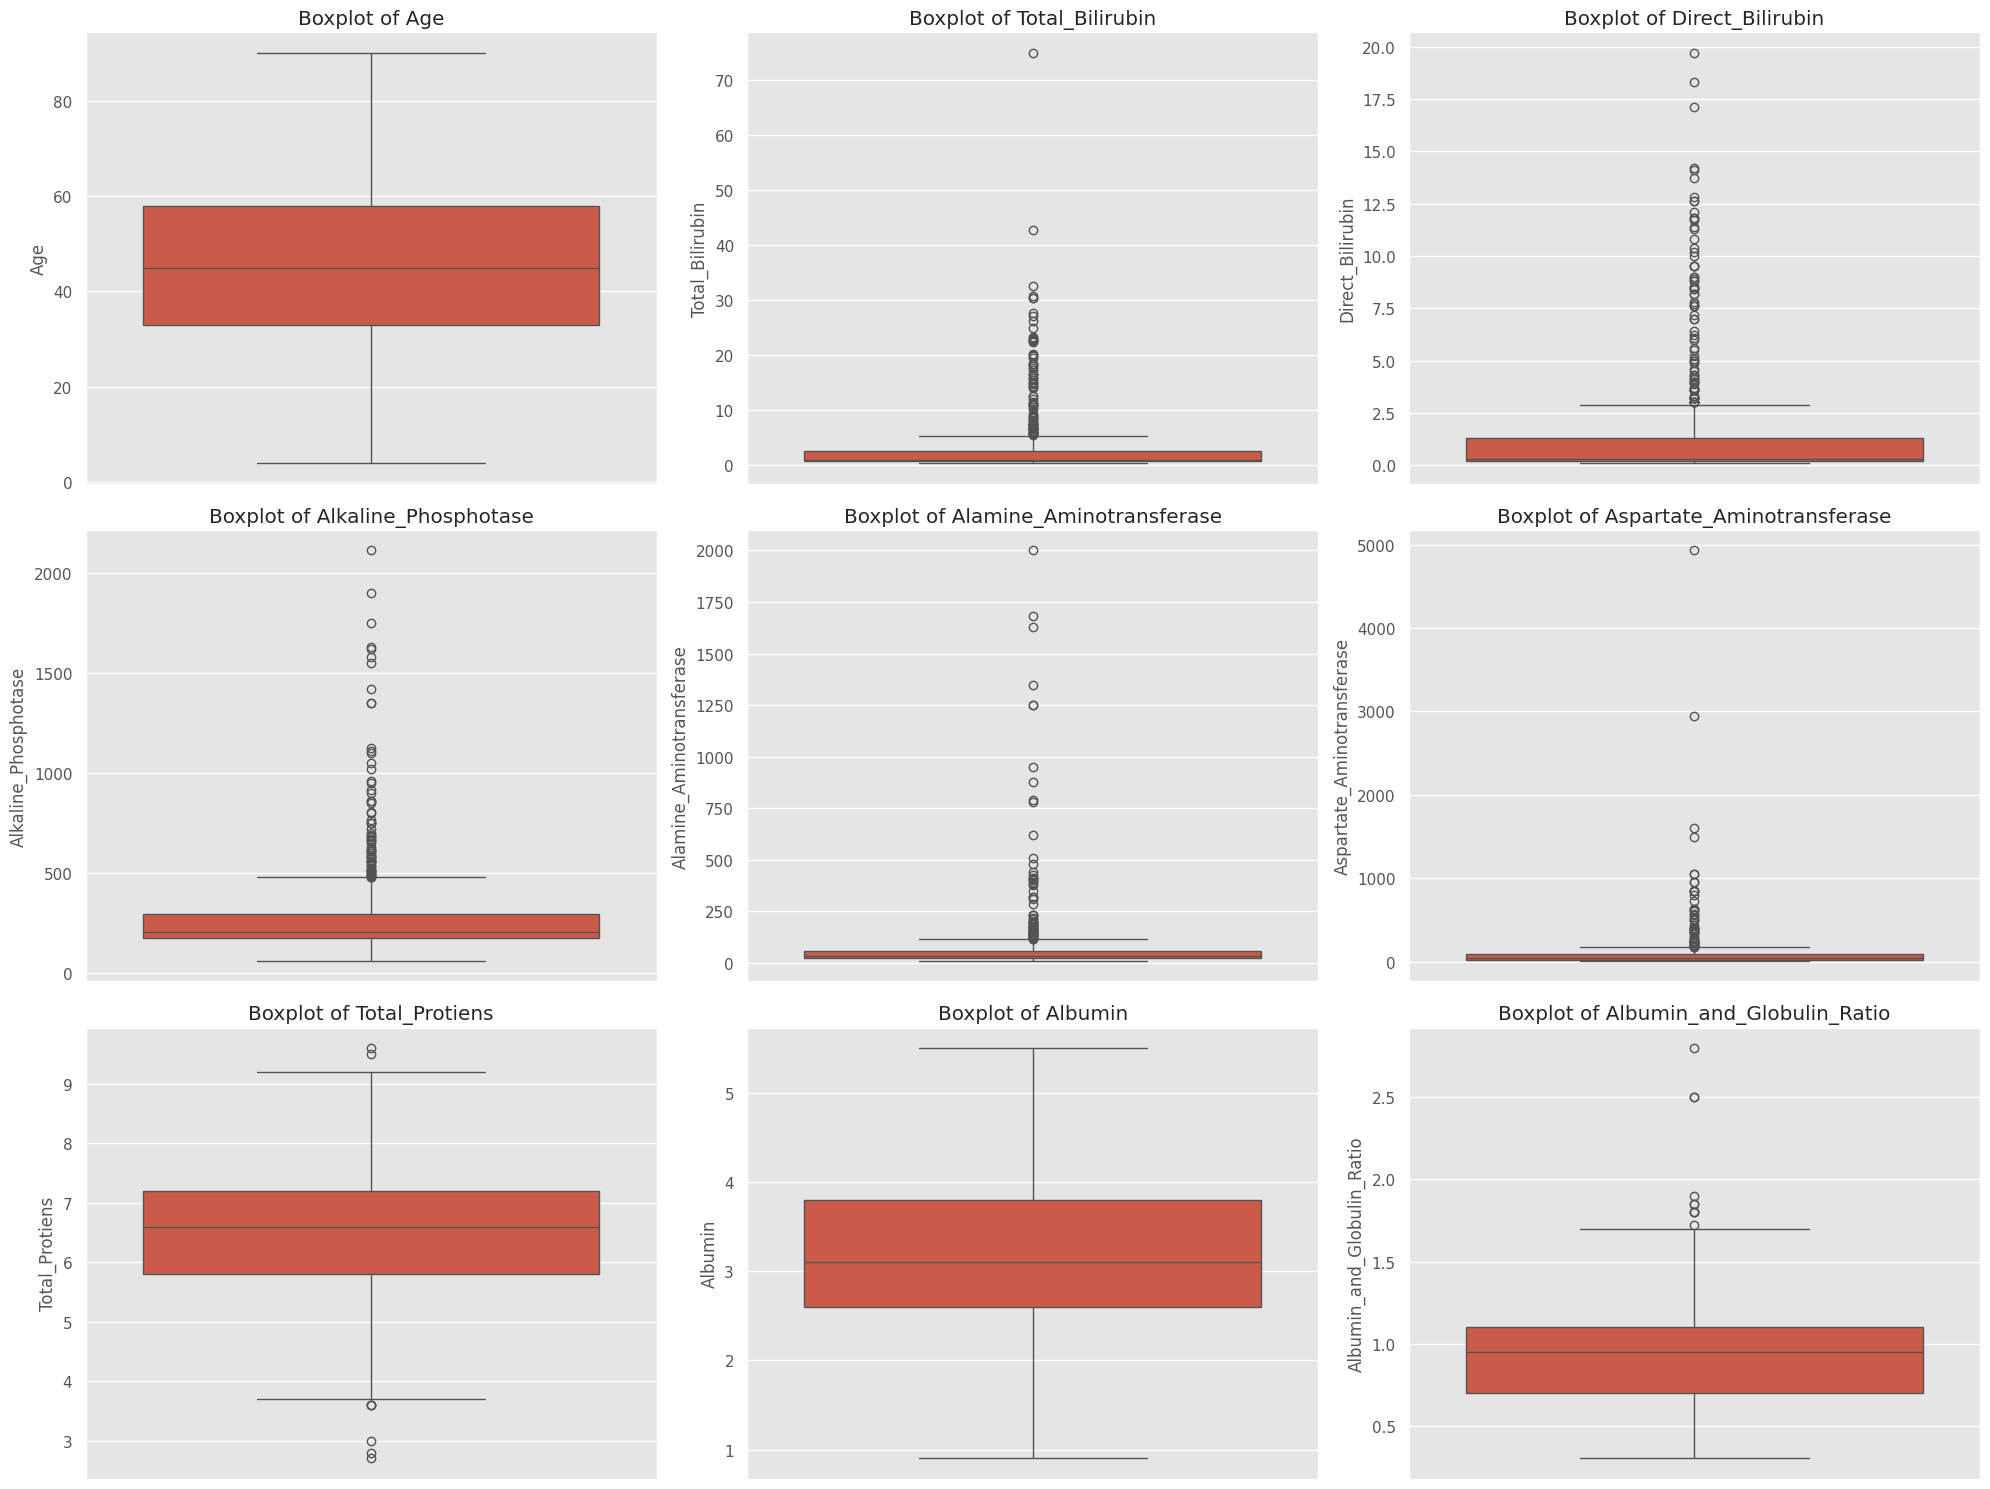

In [26]:
columns = [col for col in df.columns if col not in ['Dataset', 'Gender']]
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Changed to 3x3 grid
    sns.boxplot(y=column, data=df)
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=-45)
plt.tight_layout()
plt.show()

In [27]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [28]:
df = df[df.Aspartate_Aminotransferase<=3000]

In [29]:
df.shape

(569, 11)

In [30]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [31]:
df = df[df.Aspartate_Aminotransferase<=2500]

In [32]:
df.shape

(568, 11)

# Handling Missing Values

<Axes: >

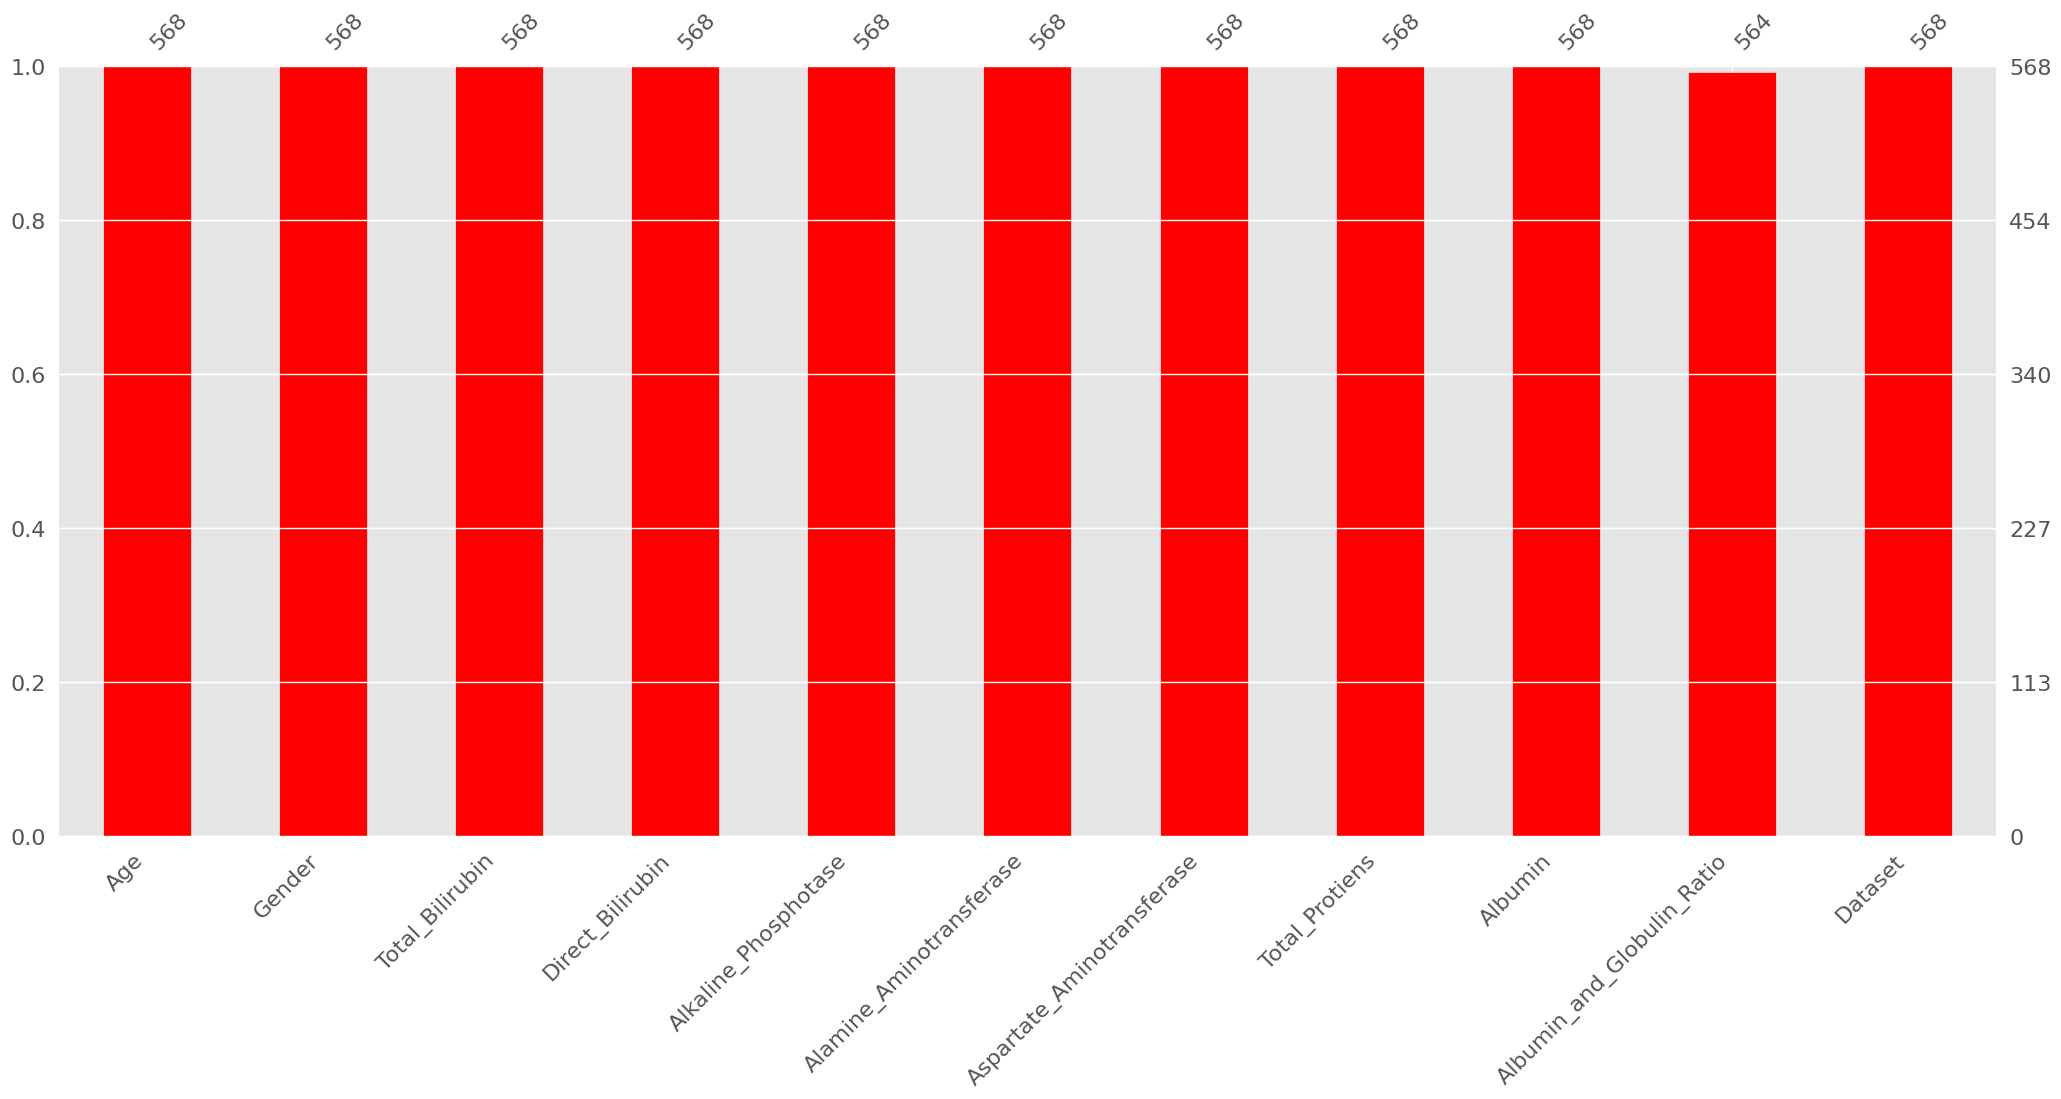

In [33]:
import missingno as msno
msno.bar(df, color = "red")

In [34]:
df = df.dropna(how='any')

In [35]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [36]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [38]:
df["Dataset"].value_counts()

Dataset
1    402
0    162
Name: count, dtype: int64

# Handling Imbalanced Dataset

In [39]:
df_majority = df[df['Dataset'] == 1]
df_minority = df[df['Dataset'] == 0]

In [40]:
downsample_indices = np.random.choice(df_majority.index, size = len(df_minority), replace=False)

In [41]:
df_majority_downsampled = df_majority.loc[downsample_indices]

In [42]:
df_majority_downsampled.shape

(162, 11)

In [43]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [44]:
df_downsampled = df_downsampled.sample(frac = 1, random_state = 42).reset_index(drop=True)

In [45]:
df_downsampled['Dataset'].value_counts()

Dataset
1    162
0    162
Name: count, dtype: int64

# Machine Learning Algorithms

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [58]:
X = df_downsampled.drop(columns = ['Dataset'])
y = df_downsampled['Dataset']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [60]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [61]:
y_pred = lr.predict(X_test)

In [62]:
print(accuracy_score(y_train, lr.predict(X_train)))
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)
print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

0.722007722007722
0.6461538461538462
[[30  9]
 [14 12]]
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        39
           1       0.57      0.46      0.51        26

    accuracy                           0.65        65
   macro avg       0.63      0.62      0.62        65
weighted avg       0.64      0.65      0.64        65



In [63]:
rand_cls = RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.75, min_samples_leaf=5, min_samples_split=3, n_estimators = 100)

In [64]:
rand_cls.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.75,
                       min_samples_leaf=5, min_samples_split=3)

In [65]:
print(accuracy_score(y_train, rand_cls.predict(X_train)))
rand_cls_acc = accuracy_score(y_test, rand_cls.predict(X_test))
print(rand_cls_acc)
print(confusion_matrix(y_test, rand_cls.predict(X_test)))
print(classification_report(y_test, rand_cls.predict(X_test)))

0.9111969111969112
0.6923076923076923
[[29 10]
 [10 16]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        39
           1       0.62      0.62      0.62        26

    accuracy                           0.69        65
   macro avg       0.68      0.68      0.68        65
weighted avg       0.69      0.69      0.69        65



# Model Evaluation

In [66]:
models = pd.DataFrame({
    'Model':['Logistic Regreesion', 'Random Forest Classifier'],
    'Score':[100*round(lr_acc, 4), 100*round(rand_cls_acc, 4)]
})

In [67]:
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest Classifier,69.23
0,Logistic Regreesion,64.62


# Model Saving

In [57]:
import joblib
joblib.dump(rand_cls, 'liver.joblib')

['liver.joblib']